### A Simplied Interface to Text Classification With Hugging Face Transformers in TensorFlow Using [ktrain](https://github.com/amaiya/ktrain)

*ktrain* requires TensorFlow 2.  
  
  
Réference : https://towardsdatascience.com/text-classification-with-hugging-face-transformers-in-tensorflow-2-without-tears-ee50e4f3e7ed

In [ ]:
!pip3 install -q tensorflow_gpu==2.1.0

     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 450kB 47.0MB/s 
     |████████████████████████████████| 3.9MB 46.8MB/s 
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.1.0


We then need to install *ktrain* library using pip.

In [ ]:
!pip3 install -q ktrain

     |████████████████████████████████| 25.3MB 130kB/s 
     |████████████████████████████████| 421.8MB 27kB/s 
     |████████████████████████████████| 6.7MB 55.2MB/s 
     |████████████████████████████████| 983kB 14.5MB/s 
     |████████████████████████████████| 245kB 56.5MB/s 
     |████████████████████████████████| 778kB 52.1MB/s 
     |████████████████████████████████| 471kB 52.7MB/s 
     |████████████████████████████████| 276kB 14.6MB/s 
     |████████████████████████████████| 890kB 53.1MB/s 
     |████████████████████████████████| 1.1MB 51.9MB/s 
     |████████████████████████████████| 3.0MB 54.1MB/s 


### Load a Dataset Into Arrays

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
! cp -R /content/drive/"My Drive"/"foo"/Data /content

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/Data/EULA_Training_Data_Set_1_v1.csv')

In [ ]:
x, y = df['Clause Text'].values, df['Classification'].values

In [ ]:
random_state = 1234
test_ratio = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_ratio, random_state = random_state)

In [ ]:
classes = list(set(y))
classes

[0, 1]

In [ ]:
import ktrain
from ktrain import text

# **DistilBERT**

## STEP 1:  Preprocess Data and Create a Transformer Model

We will use [DistilBERT](https://arxiv.org/abs/1910.01108).

In [ ]:
MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500, classes= classes)
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)
model = t.get_classifier()

/usr/local/lib/python3.6/dist-packages/ktrain/text/preprocessor.py:400: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')


preprocessing train...
language: en
train sequence lengths:
	mean : 80
	95percentile : 262
	99percentile : 466


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 81
	95percentile : 265
	99percentile : 512


In [ ]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=16)

## STEP 2 : Estimate the Learning Rate *(opitonal)*  


```
learner.lr_find()
learner.lr_plot()
```
Or
```
learner.lr_find(show_plot = True, max_epochs = ?)
```



In [ ]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Train for 393 steps
Epoch 1/1024
393/393 [==============================] - 356s 907ms/step - loss: 0.6340 - accuracy: 0.5663
Epoch 2/1024
393/393 [==============================] - 352s 895ms/step - loss: 0.4132 - accuracy: 0.8094
Epoch 3/1024
393/393 [==============================] - 351s 893ms/step - loss: 0.5162 - accuracy: 0.8048
Epoch 4/1024
212/393 [===============>..............] - ETA: 2:38 - loss: 3.4280 - accuracy: 0.8071

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


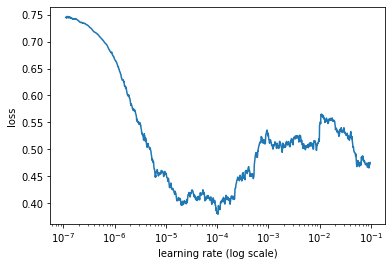

In [ ]:
learner.lr_plot()

In [ ]:
lr = 1e-4

## STEP 3:  Train the Model

In [ ]:
# learner.fit_onecycle(5e-6, 4)
learner.fit_onecycle(lr, 6)



begin training using onecycle policy with max lr of 0.0001...
Train for 394 steps, validate for 50 steps
Epoch 1/6
394/394 [==============================] - 750s 2s/step - loss: 0.3979 - accuracy: 0.8095 - val_loss: 0.3517 - val_accuracy: 0.8179
Epoch 2/6
394/394 [==============================] - 748s 2s/step - loss: 0.3257 - accuracy: 0.8490 - val_loss: 0.3367 - val_accuracy: 0.8490
Epoch 3/6
394/394 [==============================] - 748s 2s/step - loss: 0.2759 - accuracy: 0.8799 - val_loss: 0.3788 - val_accuracy: 0.8547
Epoch 4/6
394/394 [==============================] - 748s 2s/step - loss: 0.2101 - accuracy: 0.9137 - val_loss: 0.3524 - val_accuracy: 0.8668
Epoch 5/6
394/394 [==============================] - 748s 2s/step - loss: 0.1179 - accuracy: 0.9535 - val_loss: 0.4085 - val_accuracy: 0.8642
Epoch 6/6
394/394 [==============================] - 748s 2s/step - loss: 0.0564 - accuracy: 0.9805 - val_loss: 0.5214 - val_accuracy: 0.8706


## STEP 4: Evaluate and Inspect the Model

In [ ]:
learner.validate(class_names=t.get_classes())

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1287
           1       0.66      0.60      0.63       289

    accuracy                           0.87      1576
   macro avg       0.79      0.77      0.78      1576
weighted avg       0.87      0.87      0.87      1576



array([[1198,   89],
       [ 115,  174]])


Let's examine the validation example about which we were the most wrong.a

In [ ]:
learner.view_top_losses(n=1, preproc=t)

----------
id:1298 | loss:7.57 | true:1 | pred:0)



## STEP 5: Making Predictions on New Data in Deployment

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [ ]:
eula = "Right to use the Software: Subject to the terms and conditions of this Agreement, McAfee grants Company a non-exclusive,"
eula = eula + " non-transferable right to use the Software listed in the Grant Letter solely for Company’s own internal business operations." 
eula = eula + " In this Agreement, to use the Software includes to download, install and access the Software. Company is not granted rights to"
eula = eula + " Updates and Upgrades unless Company has purchased Support (or a service subscription granting rights to Updates and Upgrades)." 

In [ ]:
predictor.predict(eula)

0

In [ ]:
# predicted probability scores for each category
predictor.predict_proba(eula)

array([0.93959993, 0.06040014], dtype=float32)

In [ ]:
predictor.get_classes()

[0, 1]

As expected, `soc.religion.christian` is assigned the highest probability.

Let's invoke the `explain` method to see which words contribute most to the classification.

We will need a forked version of the **eli5** library that supportes TensorFlow Keras, so let's install it first.

In [ ]:
!pip3 install -q git+https://github.com/amaiya/eli5@tfkeras_0_10_1

In [ ]:
predictor.explain(eula)

The words in the darkest shade of green contribute most to the classification and agree with what you would expect for this example.

We can save and reload our predictor for later deployment.

In [ ]:
predictor.save('my_distilbert_predictor')

In [ ]:
reloaded_predictor = ktrain.load_predictor('/tmp/my_distilbert_predictor')

In [ ]:
reloaded_predictor.predict(eula)

0

# **Albert**

In [ ]:
MODEL_NAME = 'albert-base-v2'
t2 = text.Transformer(MODEL_NAME, maxlen=500, classes= classes)
trn2 = t2.preprocess_train(x_train, y_train)
val2 = t2.preprocess_test(x_test, y_test)
albert = t2.get_classifier()

/usr/local/lib/python3.6/dist-packages/ktrain/text/preprocessor.py:400: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')


preprocessing train...
language: en
train sequence lengths:
	mean : 80
	95percentile : 262
	99percentile : 466


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 81
	95percentile : 265
	99percentile : 512


In [ ]:
learner2 = ktrain.get_learner(albert, train_data=trn2, val_data=val2, batch_size=8)

In [ ]:
learner2.lr_find()

simulating training for different learning rates... this may take a few moments...
Train for 787 steps
Epoch 1/1024
787/787 [==============================] - 1368s 2s/step - loss: 0.5159 - accuracy: 0.7508
Epoch 2/1024
425/787 [===============>..............] - ETA: 10:27 - loss: 0.7379 - accuracy: 0.7638

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


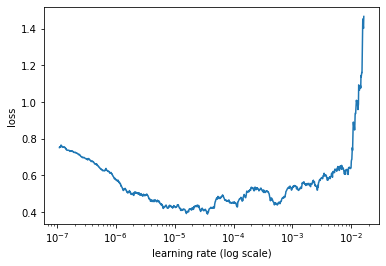

In [ ]:
learner2.lr_plot()

In [ ]:
lr2 = (1e-5 + 1e-4)/2
lr2

5.5e-05

In [ ]:
learner2.fit_onecycle(lr2, 6)

In [ ]:
learner2.validate(class_names = t2.get_classes())

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1287
           1       0.00      0.00      0.00       289

    accuracy                           0.82      1576
   macro avg       0.41      0.50      0.45      1576
weighted avg       0.67      0.82      0.73      1576



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[1287,    0],
       [ 289,    0]])

# **Roberta**

In [ ]:
MODEL_NAME = 'roberta-base'
t3 = text.Transformer(MODEL_NAME, maxlen=500, classes = classes)
trn3 = t3.preprocess_train(x_train, y_train)
val3 = t3.preprocess_test(x_test, y_test)
roberta = t3.get_classifier()

/usr/local/lib/python3.6/dist-packages/ktrain/text/preprocessor.py:400: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')


preprocessing train...
language: en
train sequence lengths:
	mean : 80
	95percentile : 262
	99percentile : 466


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 81
	95percentile : 265
	99percentile : 512


In [ ]:
learner3 = ktrain.get_learner(roberta, train_data = trn3, val_data = val3, batch_size = 8)

In [ ]:
learner3.lr_find()

simulating training for different learning rates... this may take a few moments...
Train for 787 steps
Epoch 1/1024
787/787 [==============================] - 760s 965ms/step - loss: 0.4760 - accuracy: 0.8208
Epoch 2/1024
320/787 [===========>..................] - ETA: 7:27 - loss: 0.6413 - accuracy: 0.7862

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


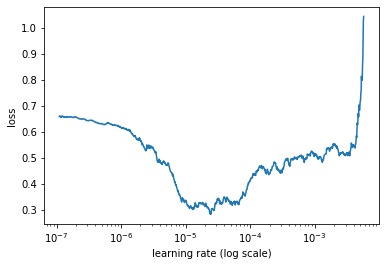

In [ ]:
learner3.lr_plot()

In [ ]:
lr3 = 4e-5

In [ ]:
learner3.fit_onecycle(lr3, 2)



begin training using onecycle policy with max lr of 4e-05...
Train for 788 steps, validate for 50 steps
788/788 [==============================] - 811s 1s/step - loss: 0.2879 - accuracy: 0.8774 - val_loss: 0.2626 - val_accuracy: 0.8788


In [ ]:
learner3.validate(class_names = t3.get_classes())

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1287
           1       0.64      0.77      0.70       289

    accuracy                           0.88      1576
   macro avg       0.79      0.84      0.81      1576
weighted avg       0.89      0.88      0.88      1576



array([[1162,  125],
       [  66,  223]])

# **XLNet**

In [ ]:
MODEL_NAME = 'xlnet-base-cased'
t4 = text.Transformer(MODEL_NAME, maxlen = 500, classes = classes)
trn4 = t4.preprocess_train(x_train, y_train)
val4 = t4.preprocess_test(x_test, y_test)
xlnet = t4.get_classifier()

/usr/local/lib/python3.6/dist-packages/ktrain/text/preprocessor.py:400: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')


preprocessing train...
language: en
train sequence lengths:
	mean : 80
	95percentile : 262
	99percentile : 466


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 81
	95percentile : 265
	99percentile : 512


In [ ]:
learner4 = ktrain.get_learner(xlnet, train_data = trn4, val_data = val4, batch_size = 4)

In [ ]:
learner4.lr_find()

simulating training for different learning rates... this may take a few moments...
Train for 1575 steps
Epoch 1/1024
1230/1575 [======================>.......] - ETA: 11:14 - loss: 0.6348 - accuracy: 0.7492

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


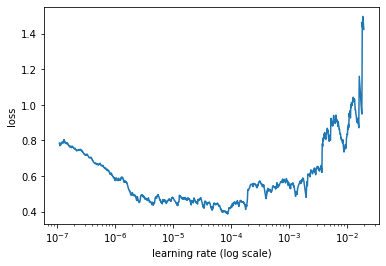

In [ ]:
learner4.lr_plot()

In [ ]:
lr4 = 1e-5

In [ ]:
learner4.fit_onecycle(lr4, 2)



begin training using onecycle policy with max lr of 1e-05...
Train for 1576 steps, validate for 50 steps
1576/1576 [==============================] - 3344s 2s/step - loss: 0.3054 - accuracy: 0.8610 - val_loss: 0.2737 - val_accuracy: 0.8794


In [ ]:
learner4.validate(class_names = t4.get_classes())

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1287
           1       0.75      0.52      0.61       289

    accuracy                           0.88      1576
   macro avg       0.82      0.74      0.77      1576
weighted avg       0.87      0.88      0.87      1576



array([[1236,   51],
       [ 139,  150]])